# Quantum Neural Networks

EstimatorQNN(*, circuit, estimator=None, observables=None, input_params=None, weight_params=None, gradient=None, input_gradients=False)

The EstimatorQNN is a neural network that takes in a parametrized quantum circuit with designated parameters for input data and/or weights, an optional observable(s) and outputs their expectation value(s). Quite often, a combined quantum circuit is used. Such a circuit is built from two circuits: a feature map, it provides input parameters for the network, and an ansatz (weight parameters).

SamplerQNN(*, circuit, sampler=None, input_params=None, weight_params=None, sparse=False, interpret=None, output_shape=None, gradient=None, input_gradients=False)

The SamplerQNN is a neural network that takes in a parametrized quantum circuit with designated parameters for input data and/or weights and translates the quasi-probabilities estimated by the Sampler primitive into predicted classes. Quite often, a combined quantum circuit is used. Such a circuit is built from two circuits: a feature map, it provides input parameters for the network, and an ansatz (weight parameters).

# 1-  The EstimatorQNN Example

## qnn.forward is a method of the EstimatorQNN class that applies the quantum circuit to the input data and weight parameters, and performs the estimation task. The specific implementation of the forward method will depend on the design of the EstimatorQNN class and the task it is intended to perform. The forward method will be the main method of the EstimatorQNN class that performs the estimation task. It usually takes input data and weight parameters as arguments, and it returns the output of the estimation, which can be a scalar or a vector depending on the task.

## Note-the input data and weights are arbitary here

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

from qiskit_machine_learning.neural_networks import EstimatorQNN

num_qubits = 2
feature_map = ZZFeatureMap(feature_dimension=num_qubits)
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)

qc = QuantumCircuit(num_qubits)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

qnn = EstimatorQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters
)

qnn.forward(input_data=[1, 2], weights=[1, 2, 3, 4])  


array([[0.10695899]])

# 2-The SamplerQNN Example


## The parity function is a Python function defined in the code, that takes an integer x as input and returns the parity of x. The parity of a number is a value that indicates whether the number of 1's in the binary representation of that number is even or odd.

## The function first converts the input x to its binary representation using the format() method, with the :b format specifier. The :b is used to format an integer as a binary string. Then it uses count("1") method to count the number of occurrences of the character '1' in the binary string and applies the modulo operation with 2 on the count of 1's. The result is 0 if the count of 1's is even and 1 if it is odd.

## The first element, 0.55347949, is the probability of class 0 and the second element, 0.44652051, is the probability of class 1.

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

from qiskit_machine_learning.neural_networks import SamplerQNN

num_qubits = 2
feature_map = ZZFeatureMap(feature_dimension=num_qubits)
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)

qc = QuantumCircuit(num_qubits)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)


def parity(x):
    return "{:b}".format(x).count("1") % 2


qnn = SamplerQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=2
)

qnn.forward(input_data=[1, 2], weights=[1, 2, 3, 4])

array([[0.55347949, 0.44652051]])

The forward method applies the quantum circuit to the input data and weight parameters, performs the estimation or sampling task and returns the output, usually a probability distribution.

The backward method, on the other hand, is used to compute gradients of the parameters of the quantum circuit. Gradients are values that indicate how much the output of the network changes when the parameters are changed.The gradients are used to update the parameters during training using optimization algorithms like QAOA, VQE, etc.

In summary, the forward method computes the output of the network given the input data and parameters, while the backward method computes the gradients of the parameters given the input data and parameters.

##  Estimator QNN

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 42

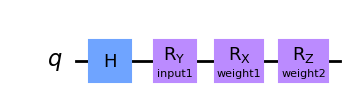

In [4]:
# construct parametrized circuit
params1 = [Parameter("input1"), Parameter("weight1"),Parameter("weight2")]
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.ry(params1[0], 0)
qc1.rx(params1[1], 0)
qc1.rz(params1[2], 0)
qc1.draw("mpl")

## The SparsePauliOp class in Qiskit provides two methods for creating an observable object: from_sparse_list() and from_list().

### The from_sparse_list() method is used to create an observable object from a sparse list of Pauli terms and coefficients. A sparse list is a list of tuples where each tuple contains a Pauli term represented as a tuple of Pauli matrices and a coefficient. The Pauli term is represented as a tuple of Pauli matrices, one for each qubit, where each element can be either "I", "X", "Y", or "Z". The coefficient is a complex number. This method is useful when the number of terms in the observable is very large, but only a few of them are non-zero.

### The from_list() method, on the other hand, is used to create an observable object from a list of Pauli terms and coefficients. A list of tuples where each tuple contains a Pauli term represented as a string of Pauli matrices and a coefficient. The Pauli term is represented as a string of Pauli matrices, one for each qubit, where each character can be either "I", "X", "Y", or "Z". The coefficient is a complex number.

### In summary, the from_sparse_list() method is used when the number of terms in the observable is very large but only a few of them are non-zero, while the from_list() method is used when all the terms in the observable are defined explicitly.

In [5]:
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])

In [6]:
qnn1 = EstimatorQNN(circuit=qc1, observables=observable1, input_params=[params1[0]], weight_params=[params1[1],params1[2]])


In [7]:
# define (random) input and weights
input1 = algorithm_globals.random.random(qnn1.num_inputs)
weights1 = algorithm_globals.random.random(qnn1.num_weights)


In [8]:
# QNN forward pass
qnn1.forward(input1, weights1)


array([[0.73541268]])

In [9]:
# QNN batched forward pass
qnn1.forward([input1, input1], weights1)



array([[0.73541268],
       [0.73541268]])

In [10]:
# QNN backward pass
qnn1.backward(input1, weights1)


(None, array([[[0.41348714, 0.24253636]]]))

In [11]:
# QNN batched backward pass
qnn1.backward([input1, input1], weights1)

(None,
 array([[[0.41348714, 0.24253636]],
 
        [[0.41348714, 0.24253636]]]))

In [12]:
observable2 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

qnn2 = EstimatorQNN(
    circuit=qc1,
    observables=[observable1, observable2],
    input_params=[params1[0]],
    weight_params=[params1[1],params1[2]],
)


In [13]:
# QNN forward pass
qnn2.forward(input1, weights1)



array([[ 0.73541268, -0.63272767]])

In [14]:
# QNN backward pass
qnn2.backward(input1, weights1)

(None,
 array([[[ 4.13487140e-01,  2.42536364e-01],
         [ 2.97009399e-01, -5.55111512e-17]]]))

## Sampler QNN

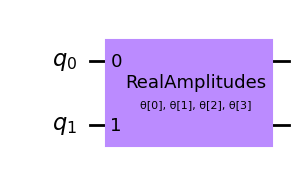

In [15]:
from qiskit.primitives import Sampler
from qiskit_machine_learning.neural_networks import SamplerQNN
qc = RealAmplitudes(2, entanglement="linear", reps=1)
qc.draw(output="mpl")

In [16]:
# specify sampler-based QNN
qnn4 = SamplerQNN(circuit=qc, input_params=[], weight_params=qc.parameters)


In [17]:
# define (random) input and weights
input4 = algorithm_globals.random.random(qnn4.num_inputs)
weights4 = algorithm_globals.random.random(qnn4.num_weights)


In [18]:
# QNN forward pass
qnn4.forward(input4, weights4)


array([[0.65262465, 0.09121934, 0.03725174, 0.21890427]])

In [19]:

# QNN backward pass, returns a tuple of matrices, None for the gradients with respect to input data.
qnn4.backward(input4, weights4)

(None,
 array([[[-0.10537766, -0.40039716, -0.24399178, -0.15592115],
         [-0.12608552,  0.03095581,  0.24399178, -0.14130925],
         [-0.10449308,  0.13568725, -0.09030263,  0.15592115],
         [ 0.33595626,  0.23375409,  0.09030263,  0.14130925]]]))